We want to code a trading strategy on the volatility and compare it with and without the sentiment that we got from the reddit analysis 

1. We are looking to assess risk based on volatility
2. To incorporate the 'Avg_sentiment' and 'submission_count' into our trading strategy we correlate sentiment extremes with market tops or bottoms
3. To calculated volatilty we will use volatility (standard deviation of returns) and Average True Range (ATR).
4. To measure the performance of our strategy we will use Sharpe ratio, total return and maximum drawdown
5. We will be using Python for our analysis and the libraries : pyfolio, pandas and matplotlib for analysis.


We will follow these steps:

Step 1: Signal Generation
Generate buy and sell signals based on sentiment extremes:

Step 2: Backtesting
Simulate the trading strategy using historical data.

Step 3: Performance Evaluation
Evaluate the performance using metrics such as Sharpe ratio, total return, and maximum drawdown.

In [4]:
import pandas as pd
import numpy as np

In [5]:
# Load the dataset for the stock you want
data0 = pd.read_csv('tsla_data_bis.csv', delimiter=';')

,date,avg_sentiment,submission_count,Open,High,Low,Close,Adj Close,Volume
0,2013-06-27,0.000000,3,7.116667,7.350000,7.075333,7.283333,7.283333,131173500
1,2013-06-28,0.000000,1,7.238000,7.296000,7.114000,7.157333,7.157333,86229000
2,2013-07-01,0.000000,2,7.290667,7.851333,7.276667,7.812000,7.812000,163554000
3,2013-07-02,0.000000,1,7.883333,8.126000,7.700000,7.854667,7.854667,180961500
4,2013-07-03,1.000000,1,7.866667,7.950000,7.618000,7.682667,7.682667,72100500
...,...,...,...,...,...,...,...,...,...
2391,2022-12-23,-0.083333,48,126.370003,128.619995,121.019997,123.150002,123.150002,166989700
2392,2022-12-27,-0.205882,68,117.500000,119.669998,108.760002,109.099998,109.099998,208643400
2393,2022-12-28,-0.108696,46,110.349998,116.269997,108.239998,112.709999,112.709999,221070500
2394,2022-12-29,-0.128205,39,120.389999,123.570000,117.500000,121.820000,121.820000,221923300


Let’s start by preprocessing your data, calculating the daily returns, standard deviation of those returns, and the ATR. I'll set up these calculations and demonstrate how to calculate the first few indicators. We’ll start by processing the data, calculating daily returns, and setting up the ATR calculation.

In [6]:
# Convert 'date' column to datetime if it's not already
data0['date'] = pd.to_datetime(data0['date'])

# Calculate Daily Returns
#Daily Returns: The pct_change() function calculates the percentage change from the previous row.
data0['daily_returns'] = data0['Close'].pct_change()

# Calculate Volatility as the rolling standard deviation of daily returns
data0['volatility'] = data0['daily_returns'].rolling(window=14).std()

# Calculate True Range (TR)
#True Range (TR): Considers the greatest of the following: current high minus current low, absolute value of current high minus previous close, and absolute value of current low minus previous close.
data0['tr'] = np.maximum(data0['High'] - data0['Low'],
                         np.maximum(abs(data0['High'] - data0['Close'].shift(1)),
                                    abs(data0['Low'] - data0['Close'].shift(1))))

# Calculate Average True Range (ATR) as the rolling average of the True Range
#Average True Range (ATR): Takes the rolling average of the True Range over a 14-day window to smooth out daily fluctuations.
data0['atr'] = data0['tr'].rolling(window=14).mean()

data0


,date,avg_sentiment,submission_count,Open,High,Low,Close,Adj Close,Volume,daily_returns,volatility,tr,atr
0,2013-06-27,0.000000,3,7.116667,7.350000,7.075333,7.283333,7.283333,131173500,NaN,NaN,NaN,NaN
1,2013-06-28,0.000000,1,7.238000,7.296000,7.114000,7.157333,7.157333,86229000,-0.017300,NaN,0.182000,NaN
2,2013-07-01,0.000000,2,7.290667,7.851333,7.276667,7.812000,7.812000,163554000,0.091468,NaN,0.694000,NaN
3,2013-07-02,0.000000,1,7.883333,8.126000,7.700000,7.854667,7.854667,180961500,0.005462,NaN,0.426000,NaN
4,2013-07-03,1.000000,1,7.866667,7.950000,7.618000,7.682667,7.682667,72100500,-0.021898,NaN,0.332000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2391,2022-12-23,-0.083333,48,126.370003,128.619995,121.019997,123.150002,123.150002,166989700,-0.017551,0.034222,7.599998,9.692856
2392,2022-12-27,-0.205882,68,117.500000,119.669998,108.760002,109.099998,109.099998,208643400,-0.114089,0.041060,14.390000,10.126428
2393,2022-12-28,-0.108696,46,110.349998,116.269997,108.239998,112.709999,112.709999,221070500,0.033089,0.044843,8.029999,10.157141
2394,2022-12-29,-0.128205,39,120.389999,123.570000,117.500000,121.820000,121.820000,221923300,0.080827,0.053452,10.860001,10.494284


In [7]:
# Calculate quantiles for extreme positive and negative sentiment thresholds
extreme_positive_threshold = data0['avg_sentiment'].quantile(0.90)
extreme_negative_threshold = data0['avg_sentiment'].quantile(0.10)

# Define sentiment extremes based on thresholds
data0['sentiment_extreme'] = 'Neutral'  # Default to neutral
data0.loc[data0['avg_sentiment'] >= extreme_positive_threshold, 'sentiment_extreme'] = 'Extreme Positive'
data0.loc[data0['avg_sentiment'] <= extreme_negative_threshold, 'sentiment_extreme'] = 'Extreme Negative'

# Display the DataFrame to verify the sentiment labeling
print(data0[['date', 'avg_sentiment', 'sentiment_extreme']].head())


        date  avg_sentiment sentiment_extreme
0 2013-06-27            0.0           Neutral
1 2013-06-28            0.0           Neutral
2 2013-07-01            0.0           Neutral
3 2013-07-02            0.0           Neutral
4 2013-07-03            1.0  Extreme Positive


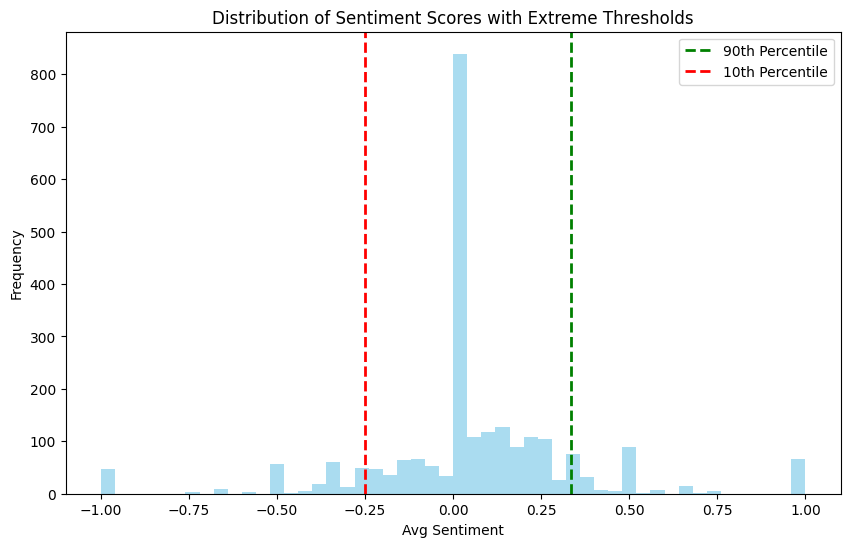

In [8]:

# Optionally, you can explore the distribution of sentiment values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(data0['avg_sentiment'], bins=50, color='skyblue', alpha=0.7)
plt.axvline(extreme_positive_threshold, color='green', linestyle='dashed', linewidth=2, label='90th Percentile')
plt.axvline(extreme_negative_threshold, color='red', linestyle='dashed', linewidth=2, label='10th Percentile')
plt.title('Distribution of Sentiment Scores with Extreme Thresholds')
plt.xlabel('Avg Sentiment')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Explanation:
Quantiles Calculation: The quantile method is used to find the 90th and 10th percentile values of the avg_sentiment column.

Labeling Extremes: Rows where avg_sentiment exceeds the 90th percentile are labeled as 'Extreme Positive', and those below the 10th percentile are labeled as 'Extreme Negative'. All other entries are labeled 'Neutral'.

Visualization: The histogram plots the distribution of avg_sentiment with lines indicating the thresholds for extreme sentiment values. This visual can help validate the appropriateness of the thresholds and give a visual sense of where the extremes lie.

Correlation with Price Extremes: Let's now analyze how these sentiment extremes correlate with significant price movements or volatility spikes. This will involve looking at the relationship between sentiment extremes and changes in Close prices or volatility.

Average absolute daily returns and volatility by sentiment category:
                   abs_daily_returns  abs_volatility
sentiment_extreme                                   
Extreme Negative            0.023257        0.028928
Extreme Positive            0.020391        0.027280
Neutral                     0.025301        0.033272

Correlation between average sentiment and absolute daily returns: -0.02408468536031183
Correlation between average sentiment and absolute volatility: -0.017702642420522493


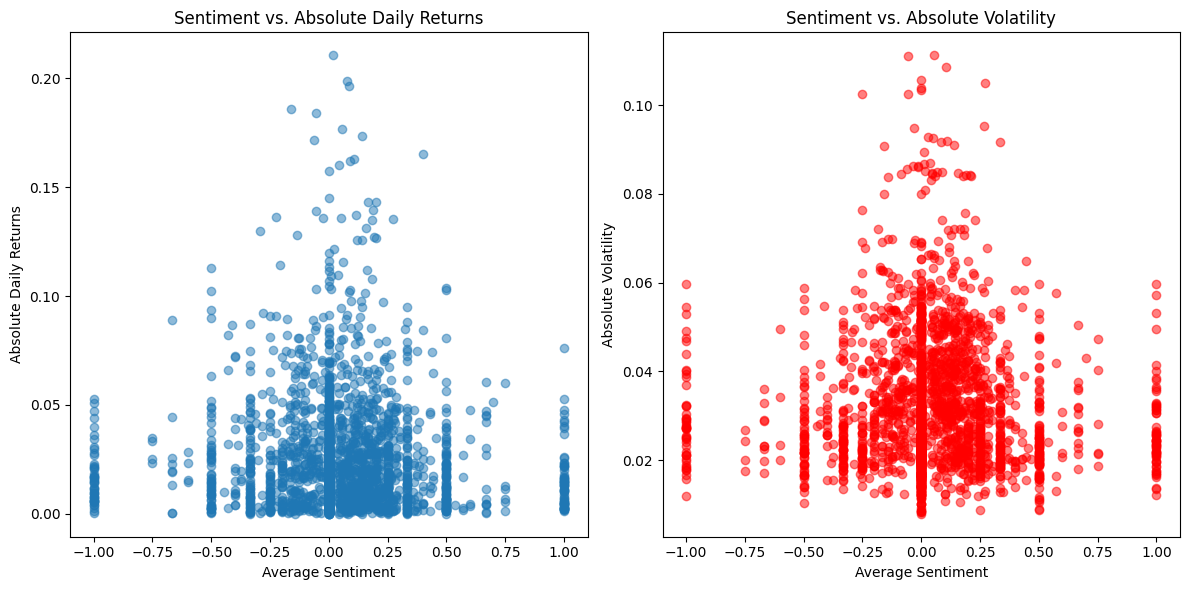

,date,avg_sentiment,submission_count,Open,High,Low,Close,Adj Close,Volume,daily_returns,volatility,tr,atr,sentiment_extreme,abs_daily_returns,abs_volatility
0,2013-06-27,0.000000,3,7.116667,7.350000,7.075333,7.283333,7.283333,131173500,NaN,NaN,NaN,NaN,Neutral,NaN,NaN
1,2013-06-28,0.000000,1,7.238000,7.296000,7.114000,7.157333,7.157333,86229000,-0.017300,NaN,0.182000,NaN,Neutral,0.017300,NaN
2,2013-07-01,0.000000,2,7.290667,7.851333,7.276667,7.812000,7.812000,163554000,0.091468,NaN,0.694000,NaN,Neutral,0.091468,NaN
3,2013-07-02,0.000000,1,7.883333,8.126000,7.700000,7.854667,7.854667,180961500,0.005462,NaN,0.426000,NaN,Neutral,0.005462,NaN
4,2013-07-03,1.000000,1,7.866667,7.950000,7.618000,7.682667,7.682667,72100500,-0.021898,NaN,0.332000,NaN,Extreme Positive,0.021898,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2391,2022-12-23,-0.083333,48,126.370003,128.619995,121.019997,123.150002,123.150002,166989700,-0.017551,0.034222,7.599998,9.692856,Neutral,0.017551,0.034222
2392,2022-12-27,-0.205882,68,117.500000,119.669998,108.760002,109.099998,109.099998,208643400,-0.114089,0.041060,14.390000,10.126428,Neutral,0.114089,0.041060
2393,2022-12-28,-0.108696,46,110.349998,116.269997,108.239998,112.709999,112.709999,221070500,0.033089,0.044843,8.029999,10.157141,Neutral,0.033089,0.044843
2394,2022-12-29,-0.128205,39,120.389999,123.570000,117.500000,121.820000,121.820000,221923300,0.080827,0.053452,10.860001,10.494284,Neutral,0.080827,0.053452


In [9]:
# Convert daily returns and volatility into absolute values to focus on magnitude of changes
data0['abs_daily_returns'] = data0['daily_returns'].abs()
data0['abs_volatility'] = data0['volatility'].abs()

# Group data based on sentiment extremes and calculate mean of daily returns and volatility
grouped_data = data0.groupby('sentiment_extreme')[['abs_daily_returns', 'abs_volatility']].mean()

# Display the grouped mean data
print("Average absolute daily returns and volatility by sentiment category:")
print(grouped_data)

# Calculate correlations
correlation_returns = data0['avg_sentiment'].corr(data0['abs_daily_returns'])
correlation_volatility = data0['avg_sentiment'].corr(data0['abs_volatility'])

print(f"\nCorrelation between average sentiment and absolute daily returns: {correlation_returns}")
print(f"Correlation between average sentiment and absolute volatility: {correlation_volatility}")

# Visualization
# Plotting sentiment extremes against daily returns and volatility
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data0['avg_sentiment'], data0['abs_daily_returns'], alpha=0.5)
plt.title('Sentiment vs. Absolute Daily Returns')
plt.xlabel('Average Sentiment')
plt.ylabel('Absolute Daily Returns')

plt.subplot(1, 2, 2)
plt.scatter(data0['avg_sentiment'], data0['abs_volatility'], alpha=0.5, color='red')
plt.title('Sentiment vs. Absolute Volatility')
plt.xlabel('Average Sentiment')
plt.ylabel('Absolute Volatility')

plt.tight_layout()
plt.show()
data0

Explanation:
Absolute Values: By converting daily returns and volatility to their absolute values, we focus on the magnitude of price movements and volatility, which is more relevant for assessing risk and correlation with sentiment.

Grouping and Averages: The code groups the data by sentiment extremes and calculates the average absolute daily returns and volatility for each sentiment category. This helps in understanding the typical impact sentiment extremes might have on the stock's behavior.

Correlation Calculation: The corr method is used to calculate the Pearson correlation between average sentiment and both absolute daily returns and absolute volatility.

Visualization: Scatter plots are generated to visually assess the relationship between sentiment and price movements/volatility. This can give a preliminary idea of any linear correlation or pattern

**Grouped Data Results:**

Extreme Negative Sentiment: Shows the highest average absolute daily returns, suggesting that days with extremely negative sentiment tend to have larger price movements.

Extreme Positive Sentiment: Exhibits slightly lower average absolute daily returns than extreme negative sentiment, but lower average absolute volatility, indicating more stability despite positive extremes.

Neutral Sentiment: Shows the lowest average absolute daily returns and volatility, which suggests that days with neutral sentiment have less significant price movements and lower volatility.


**Correlation Results:**

The correlation between average sentiment and absolute daily returns is approximately -0.065, which is a weak negative correlation. This indicates that as sentiment becomes more positive, the magnitude of daily returns slightly decreases.

The correlation between average sentiment and absolute volatility is approximately -0.066, similarly indicating a weak negative correlation. This suggests that higher positive sentiment is marginally associated with less volatility.


**Scatter Plots:**

Sentiment vs. Absolute Daily Returns: The distribution is fairly scattered, with no strong pattern indicating a clear relationship. The cluster of data points around lower sentiment values with varying returns might indicate that negative sentiment can lead to both high and low absolute returns, but no strong linear correlation is evident.

Sentiment vs. Absolute Volatility: This plot also shows a scattered distribution, mostly centered on lower sentiment values with generally low volatility. The absence of a clear trend supports the weak correlation coefficient observed.


**Interpretation:**
The weak correlations suggest that while sentiment has some influence on market behavior, it does not strongly predict the magnitude of price changes or volatility on its own. Other market factors likely play significant roles.
The higher values for absolute returns and volatility on days with extreme negative sentiment could indicate market overreactions to bad news, which might correct shortly afterward (common in volatile markets).

These insights could be useful for refining trading strategies, particularly by employing more nuanced approaches when considering sentiment data. For instance, incorporating additional technical or fundamental analysis might help in understanding the full impact of sentiment on market movements.

In [10]:
# Define buy and sell signals
data0['signal'] = 0  # Default to no signal

# Buy signal on extreme negative sentiment
data0.loc[data0['sentiment_extreme'] == 'Extreme Negative', 'signal'] = 1

# Sell signal on extreme positive sentiment
data0.loc[data0['sentiment_extreme'] == 'Extreme Positive', 'signal'] = -1

# Display the DataFrame to verify the signals
print(data0[['date', 'avg_sentiment', 'sentiment_extreme', 'signal']].head())

        date  avg_sentiment sentiment_extreme  signal
0 2013-06-27            0.0           Neutral       0
1 2013-06-28            0.0           Neutral       0
2 2013-07-01            0.0           Neutral       0
3 2013-07-02            0.0           Neutral       0
4 2013-07-03            1.0  Extreme Positive      -1


Let's start by developing the trading strategy and implementing the backtest:


In [11]:
data0

,date,avg_sentiment,submission_count,Open,High,Low,Close,Adj Close,Volume,daily_returns,volatility,tr,atr,sentiment_extreme,abs_daily_returns,abs_volatility,signal
0,2013-06-27,0.000000,3,7.116667,7.350000,7.075333,7.283333,7.283333,131173500,NaN,NaN,NaN,NaN,Neutral,NaN,NaN,0
1,2013-06-28,0.000000,1,7.238000,7.296000,7.114000,7.157333,7.157333,86229000,-0.017300,NaN,0.182000,NaN,Neutral,0.017300,NaN,0
2,2013-07-01,0.000000,2,7.290667,7.851333,7.276667,7.812000,7.812000,163554000,0.091468,NaN,0.694000,NaN,Neutral,0.091468,NaN,0
3,2013-07-02,0.000000,1,7.883333,8.126000,7.700000,7.854667,7.854667,180961500,0.005462,NaN,0.426000,NaN,Neutral,0.005462,NaN,0
4,2013-07-03,1.000000,1,7.866667,7.950000,7.618000,7.682667,7.682667,72100500,-0.021898,NaN,0.332000,NaN,Extreme Positive,0.021898,NaN,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2391,2022-12-23,-0.083333,48,126.370003,128.619995,121.019997,123.150002,123.150002,166989700,-0.017551,0.034222,7.599998,9.692856,Neutral,0.017551,0.034222,0
2392,2022-12-27,-0.205882,68,117.500000,119.669998,108.760002,109.099998,109.099998,208643400,-0.114089,0.041060,14.390000,10.126428,Neutral,0.114089,0.041060,0
2393,2022-12-28,-0.108696,46,110.349998,116.269997,108.239998,112.709999,112.709999,221070500,0.033089,0.044843,8.029999,10.157141,Neutral,0.033089,0.044843,0
2394,2022-12-29,-0.128205,39,120.389999,123.570000,117.500000,121.820000,121.820000,221923300,0.080827,0.053452,10.860001,10.494284,Neutral,0.080827,0.053452,0


In [20]:
data0.to_csv('data00.csv')

TO MUCH SO 

Inspect Signal Distribution
First, let's inspect the distribution of the sentiment signals:

Bought 626.0 shares on 2013-07-19 00:00:00 at 7.978667 per share
Bought 612.0 shares on 2013-07-22 00:00:00 at 8.162 per share
Sold 1238.0 shares on 2013-07-25 00:00:00 at 8.271333 per share
Bought 539.0 shares on 2013-08-06 00:00:00 at 9.476667 per share
Bought 500.0 shares on 2013-08-09 00:00:00 at 10.2 per share
Sold 1039.0 shares on 2013-08-15 00:00:00 at 9.311333 per share
Bought 441.0 shares on 2013-08-26 00:00:00 at 10.948 per share
Sold 441.0 shares on 2013-08-28 00:00:00 at 11.096667 per share
Bought 430.0 shares on 2013-09-03 00:00:00 at 11.262667 per share
Sold 430.0 shares on 2013-09-05 00:00:00 at 11.328667 per share
Bought 437.0 shares on 2013-09-16 00:00:00 at 11.105333 per share
Sold 437.0 shares on 2013-09-19 00:00:00 at 11.861333 per share
Bought 414.0 shares on 2013-09-23 00:00:00 at 12.074 per share
Sold 414.0 shares on 2013-09-24 00:00:00 at 12.155333 per share
Bought 398.0 shares on 2013-09-26 00:00:00 at 12.576 per share
Bought 407.0 shares on 2013-10-04 00:00:00

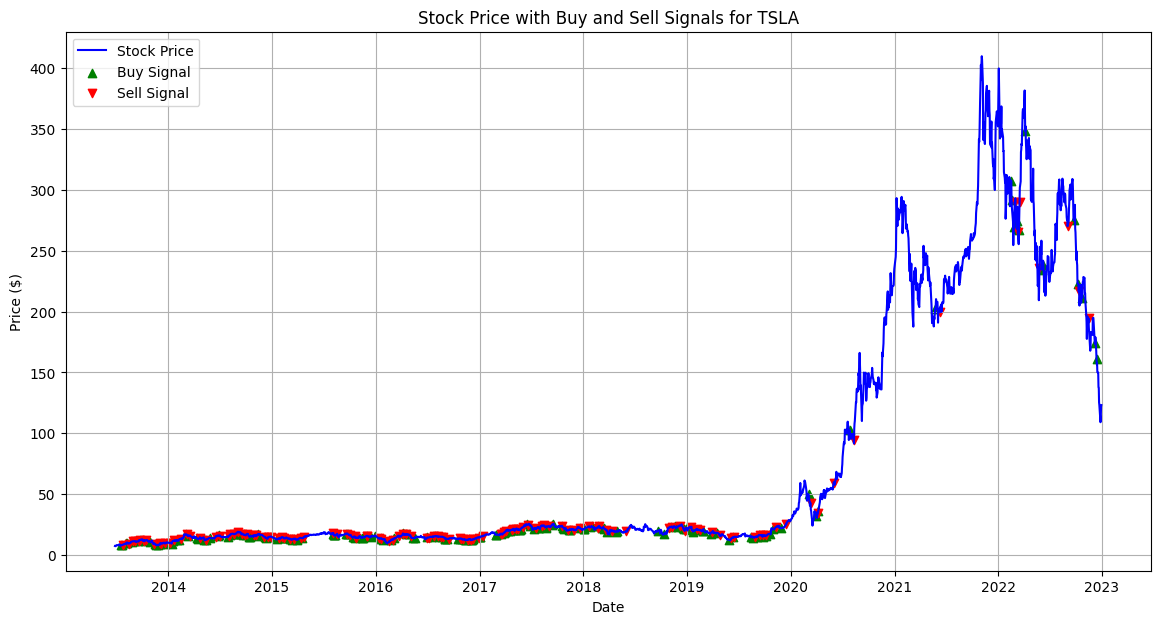

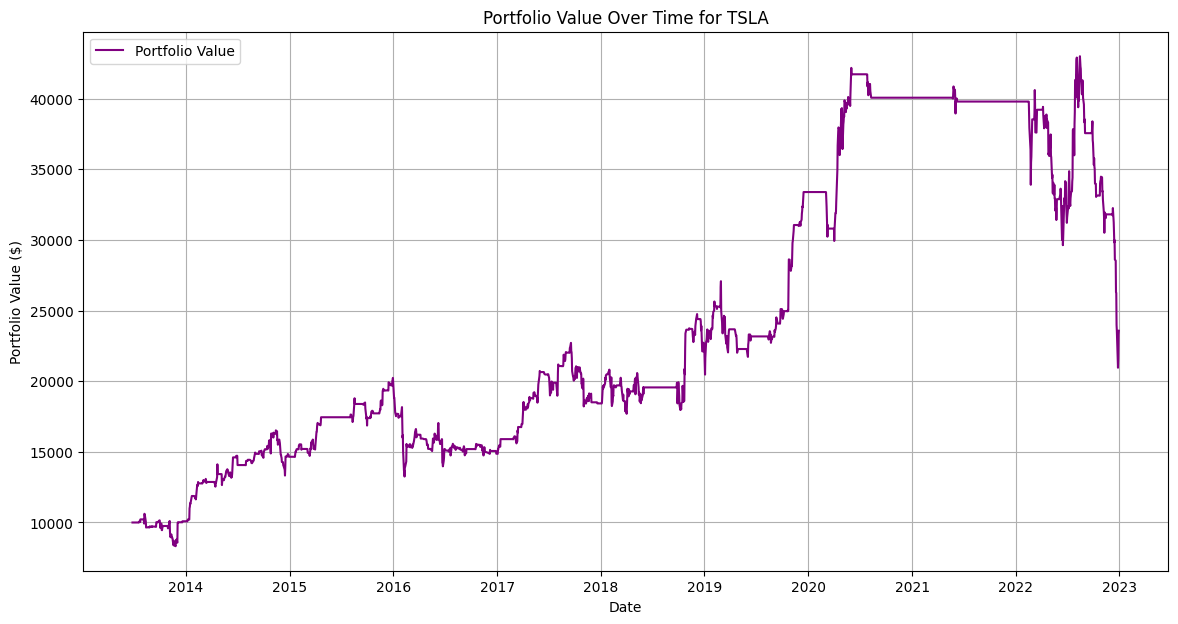

Final Portfolio Value: 23573.39


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'date' column is in datetime format
data0['date'] = pd.to_datetime(data0['date'])

# Ensure numeric columns are correctly typed
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'avg_sentiment', 'submission_count', 'daily_returns']
for col in numeric_columns:
    data0[col] = pd.to_numeric(data0[col], errors='coerce')

# Define the backtesting function
def backtest_with_signals(data, initial_cash=10000, transaction_cost=10, max_investment_proportion=0.5):
    cash = initial_cash
    shares = 0
    portfolio_values = []
    trades = []

    buy_signal = 'Extreme Negative'
    sell_signal = 'Extreme Positive'

    for index, row in data.iterrows():
        portfolio_value = cash + shares * row['Close']
        max_investment = portfolio_value * max_investment_proportion

        if row['sentiment_extreme'] == buy_signal and cash >= row['Close']:
            shares_bought = min(max_investment // row['Close'], cash // row['Close'])
            cash -= shares_bought * row['Close'] + transaction_cost
            shares += shares_bought
            trades.append({'date': row['date'], 'price': row['Close'], 'action': 'buy'})
            print(f"Bought {shares_bought} shares on {row['date']} at {row['Close']} per share")

        elif row['sentiment_extreme'] == sell_signal and shares > 0:
            cash += shares * row['Close'] - transaction_cost
            trades.append({'date': row['date'], 'price': row['Close'], 'action': 'sell'})
            print(f"Sold {shares} shares on {row['date']} at {row['Close']} per share")
            shares = 0

        portfolio_value = cash + shares * row['Close']
        portfolio_values.append({'date': row['date'], 'portfolio_value': portfolio_value})

    portfolio_df = pd.DataFrame(portfolio_values)
    trades_df = pd.DataFrame(trades)
    return portfolio_df, trades_df

# Perform backtest on entire data
portfolio_df, trades_df = backtest_with_signals(data0)

# Plot stock price with buy/sell signals
plt.figure(figsize=(14, 7))
plt.plot(data0['date'], data0['Close'], label='Stock Price', color='blue')

# Plot buy signals
buy_signals = trades_df[trades_df['action'] == 'buy']
plt.scatter(buy_signals['date'], buy_signals['price'], marker='^', color='green', label='Buy Signal', alpha=1)

# Plot sell signals
sell_signals = trades_df[trades_df['action'] == 'sell']
plt.scatter(sell_signals['date'], sell_signals['price'], marker='v', color='red', label='Sell Signal', alpha=1)

plt.title('Stock Price with Buy and Sell Signals for TSLA')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

# Plot portfolio value over time
plt.figure(figsize=(14, 7))
plt.plot(portfolio_df['date'], portfolio_df['portfolio_value'], label='Portfolio Value', color='purple')
plt.title('Portfolio Value Over Time for TSLA')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.show()

# Display final portfolio value
final_portfolio_value = portfolio_df['portfolio_value'].iloc[-1]
print(f'Final Portfolio Value: {final_portfolio_value:.2f}')


backtest_with_signals function simulates trading based on sentiment signals, logs trades, and calculates the portfolio value over time.
It records buy and sell actions along with their dates and prices.
Backtest Execution:

The entire dataset is used for backtesting.
The function returns both the portfolio values and the trade logs.
Plotting:

The stock's closing price is plotted over time.
Buy signals are marked with green upward-pointing triangles.
Sell signals are marked with red downward-pointing triangles.
Final Portfolio Value:

The final value of the portfolio is printed at the end of the backtest period.

In [49]:
###########